<a href="https://colab.research.google.com/github/datascience-uniandes/eda-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - Mexico City, Distrito Federal, Mexico [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. Imagine you're a consultant for individuals or firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2023

In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [7]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./data/listings.csv.gz")

In [8]:
# Showing dataframe dimensions
listings_df.shape

(43566, 75)

In [ ]:
# Showing column types
listings_df.dtypes

In [ ]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
listings_df.sample(5) # Showing a sample of n rows

## 2. Univariate analysis

# **Desarrollo de la estrategia**

Analysis univariate for price

In [49]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [ ]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["price_float"].nunique()

In [58]:
# find the maximun value
listings_df["price_float"].max()

90120.0

In [61]:
# find the minimun value different to 0
listings_df["price_float"].where(listings_df["price_float"] != 0).min()

10.0

In [27]:
# Calculating the relative frecuency of price
listings_df["price_float"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

150.0     0.026879
100.0     0.023642
200.0     0.021301
80.0      0.016458
50.0      0.016412
            ...   
1390.0    0.000023
927.0     0.000023
602.0     0.000023
1423.0    0.000023
997.0     0.000023
Name: price_float, Length: 1240, dtype: float64

In [97]:
# Provides important statistical values to keep in mind
listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    43566.000000
mean       225.216109
std        818.738268
min          0.000000
5%          42.000000
25%         80.000000
50%        136.000000
75%        228.000000
95%        561.000000
max      90120.000000
Name: price_float, dtype: float64

In [34]:
mediana = listings_df["price_float"].median()
print(mediana)

136.0


In [98]:
from scipy import stats
moda = stats.mode(listings_df["price_float"], keepdims=True)
print(moda)

ModeResult(mode=array([150.]), count=array([1171]))


In [86]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

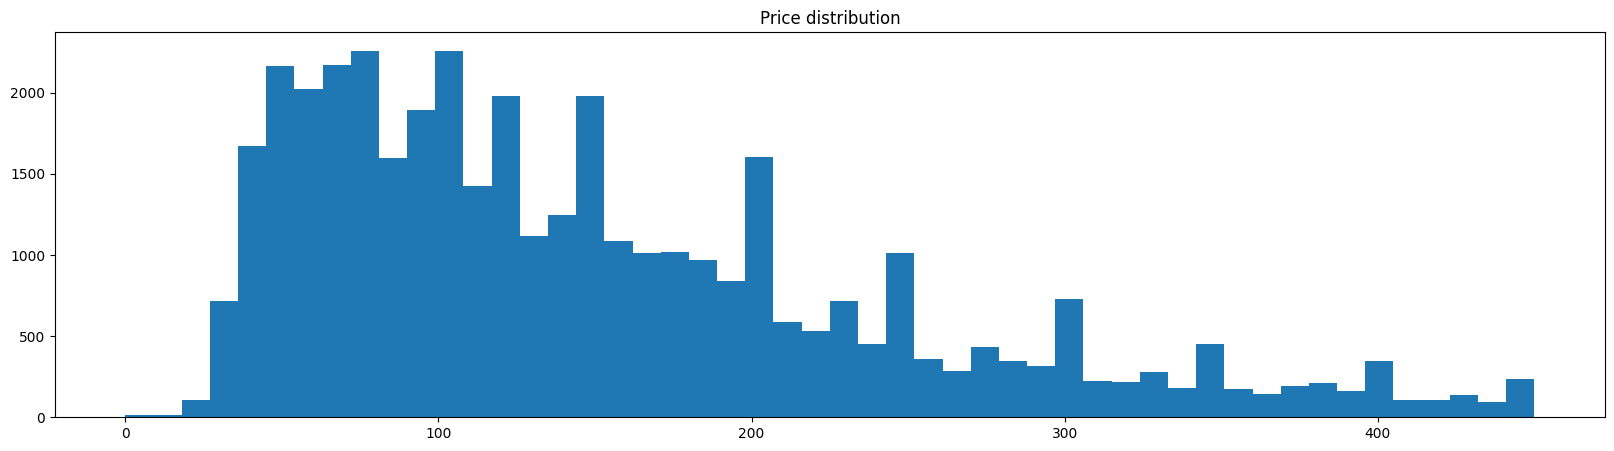

In [99]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

Analysis univariate for Minimum_nights

In [47]:
# Showing the number of unique values of listing Minimum_nights
# This can be helpful to diagnose duplicity
listings_df["minimum_nights"].nunique()

131

In [102]:
# Showing the number of unique values of listing minimum_nights
# This can be helpful to diagnose duplicity
listings_df["minimum_nights"].unique()

array([  30,    5,   21,    7,   31,    2,   90,    3,    1,  200,    4,
         60,   10,   28,   14,   15,    6,  120,   40,   48,   45,   29,
        180,  181,  365,   85,   18,  150,   12,    9,   20,    8,   89,
         50,  370,  100,   55,   27,   80,   58,   26,  265,  300,  185,
         56,  260,  240,   25,   19,  250,   42, 1124,  360,  270,   59,
        210,   70, 1250,   23,  198,  500,   13,  480,   22,   99,  186,
        119,   35,   68,  366,   32,   16,  183,   93,   69,  364,   91,
         75,   33,  299,  400,   24,   52,  108,   41,   98,  133,  222,
        130,  184,  153,  999,   62,   53,  160,  169,  114,  155,   43,
         96,  145,  182,   76, 1000,  304,   38,   17,  307,   36,  110,
        273,  238,  175,   11,   92,  259,   63,  140,   64,   94,   65,
        356,  310,   61,  301,   78,   49,   47,  367,   34,   95])

In [104]:
# find the maximun value
listings_df["minimum_nights"].max()

1250

In [106]:
# find the minimun value different to 0
listings_df["minimum_nights"].where(listings_df["minimum_nights"] != 0).min()

1

In [108]:
# Calculating the relative frecuency of room types
listings_df["minimum_nights"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

30     0.438346
1      0.183124
2      0.118074
3      0.085984
5      0.034775
         ...   
62     0.000023
53     0.000023
169    0.000023
114    0.000023
95     0.000023
Name: minimum_nights, Length: 131, dtype: float64

In [109]:
# Provides important statistical values to keep in mind
listings_df["minimum_nights"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    43566.000000
mean        18.700271
std         27.804388
min          1.000000
5%           1.000000
25%          2.000000
50%         15.000000
75%         30.000000
95%         30.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [111]:
mediana = listings_df["minimum_nights"].median()
print(mediana)

15.0


In [113]:
# Find the mod
from scipy import stats
moda = stats.mode(listings_df["minimum_nights"], keepdims=True)
print(moda)

ModeResult(mode=array([30]), count=array([19097]))


In [119]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["minimum_nights"].quantile(0.25)
q3 = listings_df["minimum_nights"].quantile(0.75)
iqr = q3 - q1

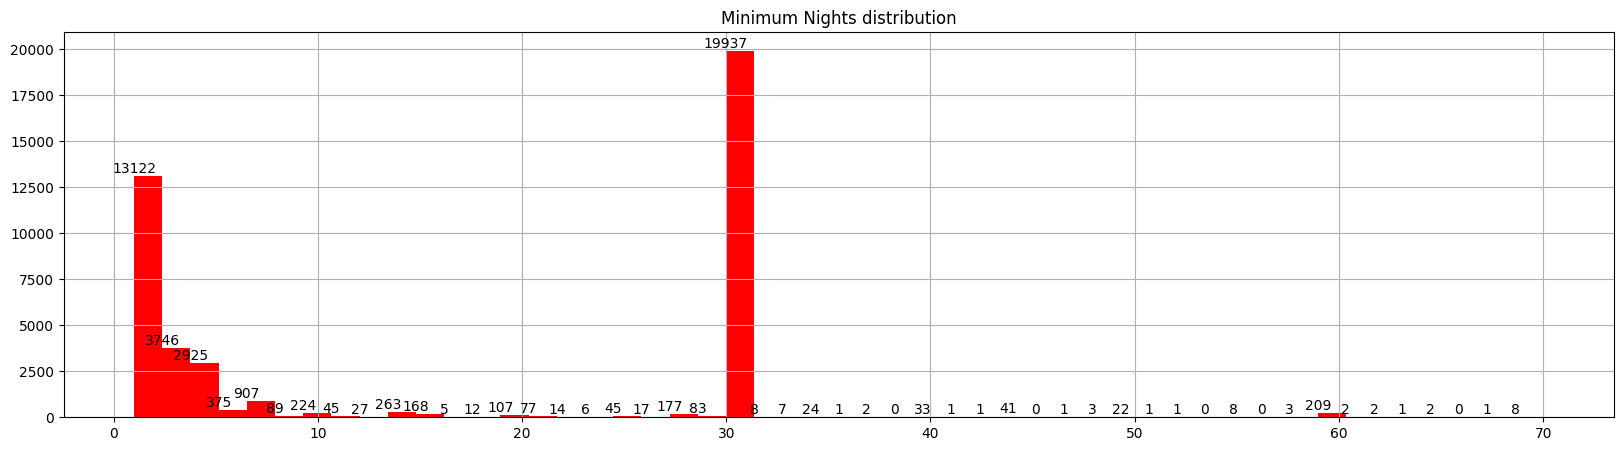

In [126]:
plt.figure(figsize=(20, 5))
hist_values, hist_edges, _ = plt.hist(listings_df.loc[listings_df["minimum_nights"] <= (q3 + 1.5 * iqr)]["minimum_nights"], bins=50, color='red')
plt.title("Minimum Nights distribution")
plt.grid(True)

# Add values to the bars
for i in range(len(hist_values)):
    plt.text(hist_edges[i], hist_values[i] + 5, str(int(hist_values[i])), ha='center', va='bottom', fontsize=10)

plt.show()

Analysis univariate for Neighbourhood

In [74]:
# Showing the number of unique values of listing Neighbourhood
# This can be helpful to diagnose duplicity
listings_df["neighbourhood_cleansed"].nunique()

223

In [75]:
# Showing the number of unique values of listing Neighbourhood
# This can be helpful to diagnose duplicity
listings_df["neighbourhood_cleansed"].unique()

array(['Midtown', 'Bedford-Stuyvesant', 'Lower East Side', 'Sunset Park',
       'Chinatown', 'Tribeca', 'East Village', 'Williamsburg',
       'Upper West Side', 'Greenwich Village', 'Chelsea', 'East Harlem',
       'South Slope', 'Clinton Hill', 'Harlem', 'Greenpoint',
       'Fort Greene', 'Clason Point', 'Washington Heights', 'Eastchester',
       "Hell's Kitchen", 'Upper East Side', 'Flatbush', 'Kips Bay',
       'Long Island City', 'Crown Heights', 'Carroll Gardens', 'Nolita',
       'West Village', 'Park Slope', 'Gowanus', 'Forest Hills',
       'Murray Hill', 'Astoria', 'Boerum Hill', 'East Flatbush',
       'Kingsbridge', 'Prospect Heights', 'Sunnyside', 'St. George',
       'Bushwick', 'Windsor Terrace', 'Ridgewood', 'Mott Haven',
       'University Heights', 'Morningside Heights', 'Ditmars Steinway',
       'Middle Village', 'Rockaway Beach', 'Allerton', 'Jamaica',
       'East New York', 'Brooklyn Heights', 'Emerson Hill',
       'Flatiron District', 'Fort Hamilton', 'Benso

In [76]:
# Calculating the relative frecuency of room types
listings_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

Bedford-Stuyvesant        0.072878
Williamsburg              0.059427
Harlem                    0.047996
Midtown                   0.047721
Bushwick                  0.041959
                            ...   
Chelsea, Staten Island    0.000023
Neponsit                  0.000023
New Dorp                  0.000023
Lighthouse Hill           0.000023
Fort Wadsworth            0.000023
Name: neighbourhood_cleansed, Length: 223, dtype: float64

In [77]:
# Provides important statistical values to keep in mind
listings_df["neighbourhood_cleansed"].describe()

count                  43566
unique                   223
top       Bedford-Stuyvesant
freq                    3175
Name: neighbourhood_cleansed, dtype: object

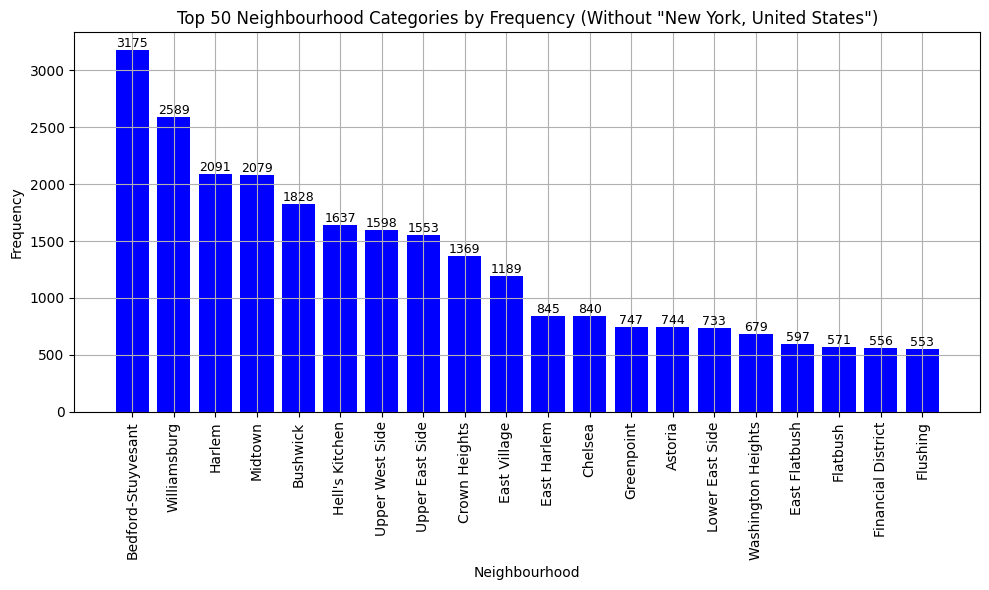

In [78]:
# Reemplazar "New York, United States" con una cadena vacía en la columna "neighbourhood"
listings_df["neighbourhood_cleansed"] = listings_df["neighbourhood_cleansed"].str.replace("New York, United States", "").str.strip()

# Calcular la frecuencia de las categorías modificadas
neighbourhood_frequencies = listings_df["neighbourhood_cleansed"].value_counts()

# Tomar los primeros 50 valores de frecuencia
neighbourhood_top50 = neighbourhood_frequencies.head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(neighbourhood_top50.index, neighbourhood_top50.values, color='blue')
plt.bar(neighbourhood_top50.index, neighbourhood_top50.values, color='blue')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Top 50 Neighbourhood Categories by Frequency (Without "New York, United States")')
plt.xticks(rotation=90)
plt.grid(True)

# Agregar los valores a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=9)


plt.tight_layout()
plt.show()

Analysis univariate for Amenities

In [24]:
# Showing the number of unique values of listing room_type
# This can be helpful to diagnose duplicity
listings_df["room_type"].nunique()

4

In [25]:
# Showing the number of unique values of listing room_type
# This can be helpful to diagnose duplicity
listings_df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [26]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

Entire home/apt    0.565785
Private room       0.417436
Shared room        0.013313
Hotel room         0.003466
Name: room_type, dtype: float64

In [27]:
# Provides important statistical values to keep in mind
listings_df["room_type"].describe()

count               43566
unique                  4
top       Entire home/apt
freq                24649
Name: room_type, dtype: object

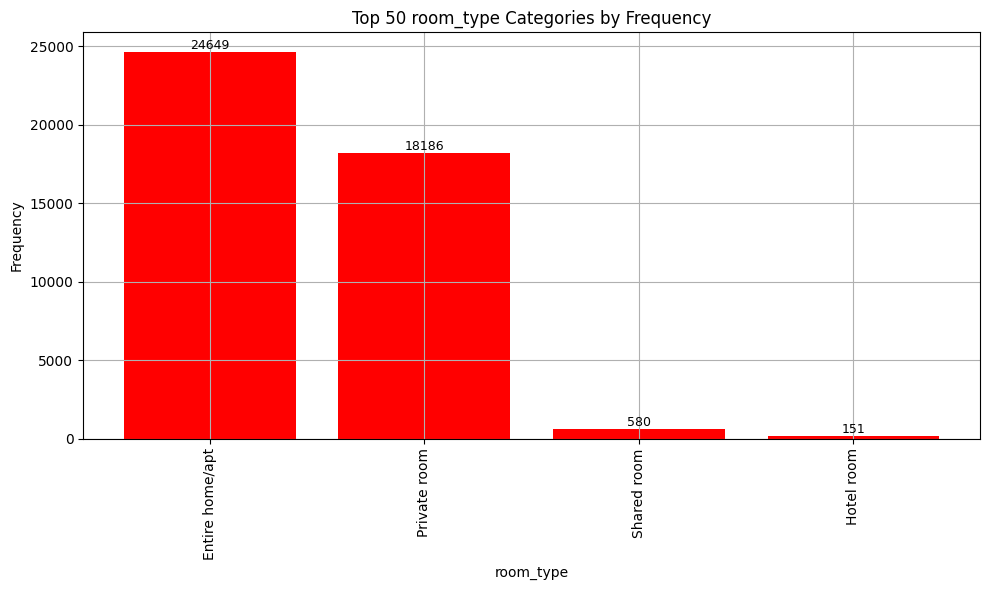

In [28]:
# Calcular la frecuencia de las categorías modificadas
room_type_frequencies = listings_df["room_type"].value_counts()

# Tomar los primeros 50 valores de frecuencia
room_type_top50 = room_type_frequencies.head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(room_type_top50.index, room_type_top50.values, color='red')
plt.bar(room_type_top50.index, room_type_top50.values, color='red')
plt.xlabel('room_type')
plt.ylabel('Frequency')
plt.title('Top 50 room_type Categories by Frequency')
plt.xticks(rotation=90)
plt.grid(True)

# Agregar los valores a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=9)


plt.tight_layout()
plt.show()

Analysis univariate for number_of_reviews

In [29]:
# Showing the number of unique values of listing number_of_reviews
# This can be helpful to diagnose duplicity
listings_df["number_of_reviews"].nunique()

490

In [30]:
# Showing the number of unique values of listing number_of_reviews
# This can be helpful to diagnose duplicity
listings_df["number_of_reviews"].unique()

array([  49,   50,   22,    3,   35,   69,  110,   38,  589,   53,  118,
         10,    5,  194,  233,   32,  189,    1,  268,  502,  165,    4,
         92,  245,  179,   13,  231,  281,  164,  334,  178,    0,   67,
         56,   58,   98,   82,  148,  240,   14,  299,   17,  368,  308,
         46,   61,  168,  253,   76,   36,  191,  269,  306,   16,   60,
         59,   90,  166,   93,   20,   68,   57,   29,  160,  479,  212,
        252,  326,   25,  225,   47,   21,   27,   75,   71,  126,  365,
         84,    7,  119,   63,  180,   70,  263,   41,   30,   15,  539,
         18,  292,  105,   37,   40,    9,   19,   52,   83,  261,  144,
        124,   43,   85,  393,   51,  254,  229,   44,   11,   31,  337,
         73,    2,  208,   62,  280,  184,   77,  255,   26,  232,  128,
        447,  193,   81,  156,  388,    6,  145,   48,  137,  239,  159,
         33,   12,  262,  282,  154,  461,  131,  122,  340,  338,  177,
        274,   34,  285,  100,  175,  260,  296,  2

In [31]:
# find the maximun value
listings_df["number_of_reviews"].max()

2024

In [46]:
# find the minimun value different to 0
listings_df["number_of_reviews"].min()

0

In [34]:
# Calculating the relative frecuency of number of reviews
listings_df["number_of_reviews"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

0      0.240922
1      0.097255
2      0.062457
3      0.046734
4      0.036772
         ...   
635    0.000023
503    0.000023
428    0.000023
485    0.000023
631    0.000023
Name: number_of_reviews, Length: 490, dtype: float64

In [36]:
# Provides important statistical values to keep in mind
listings_df["number_of_reviews"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    43566.000000
mean        26.368544
std         57.740520
min          0.000000
5%           0.000000
25%          1.000000
50%          5.000000
75%         24.000000
95%        131.000000
max       2024.000000
Name: number_of_reviews, dtype: float64

In [38]:
# Provides the median value
mediana = listings_df["number_of_reviews"].median()
print(mediana)


5.0


In [40]:
# Provides the mod value
from scipy import stats
moda = stats.mode(listings_df["number_of_reviews"], keepdims=True)
print(moda)


ModeResult(mode=array([0]), count=array([10496]))


In [42]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["number_of_reviews"].quantile(0.25)
q3 = listings_df["number_of_reviews"].quantile(0.75)
iqr = q3 - q1

[]

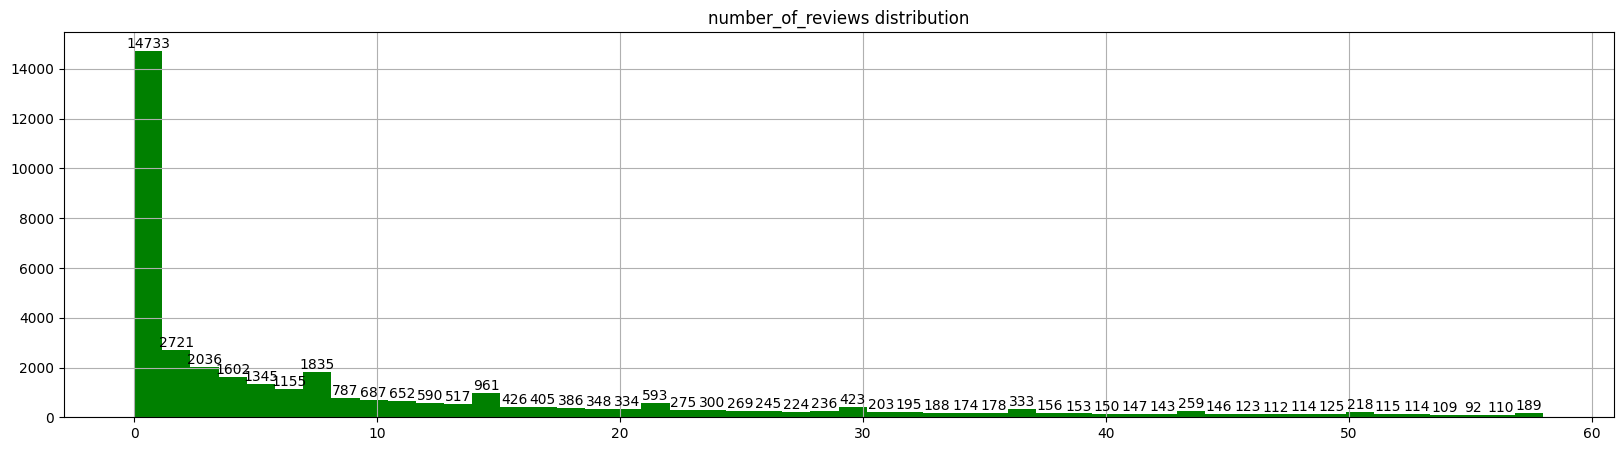

In [45]:
plt.figure(figsize=(20, 5))
n, bins, patches = plt.hist(listings_df.loc[listings_df["number_of_reviews"] <= (q3 + 1.5 * iqr)]["number_of_reviews"], bins=50, color="green")
plt.title("number_of_reviews distribution")
plt.grid(True)

for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), f"{int(n[i])}", ha="center", va="bottom")


plt.plot()

## 2. Bivariate analysis

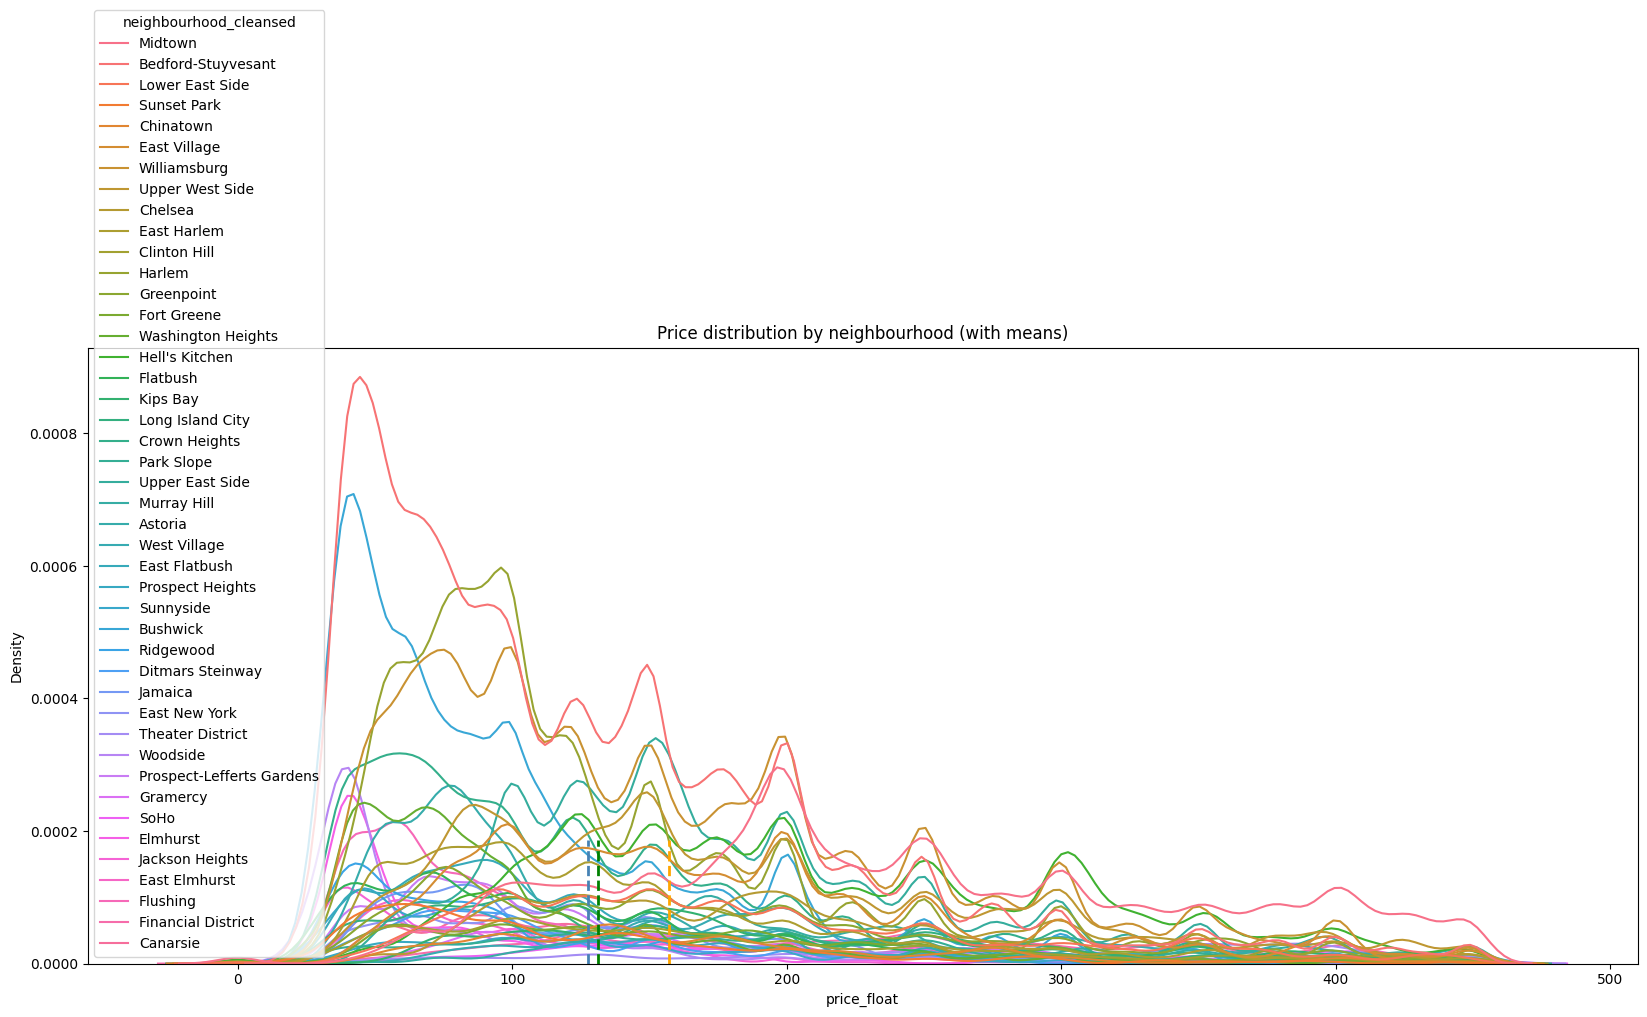

In [79]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

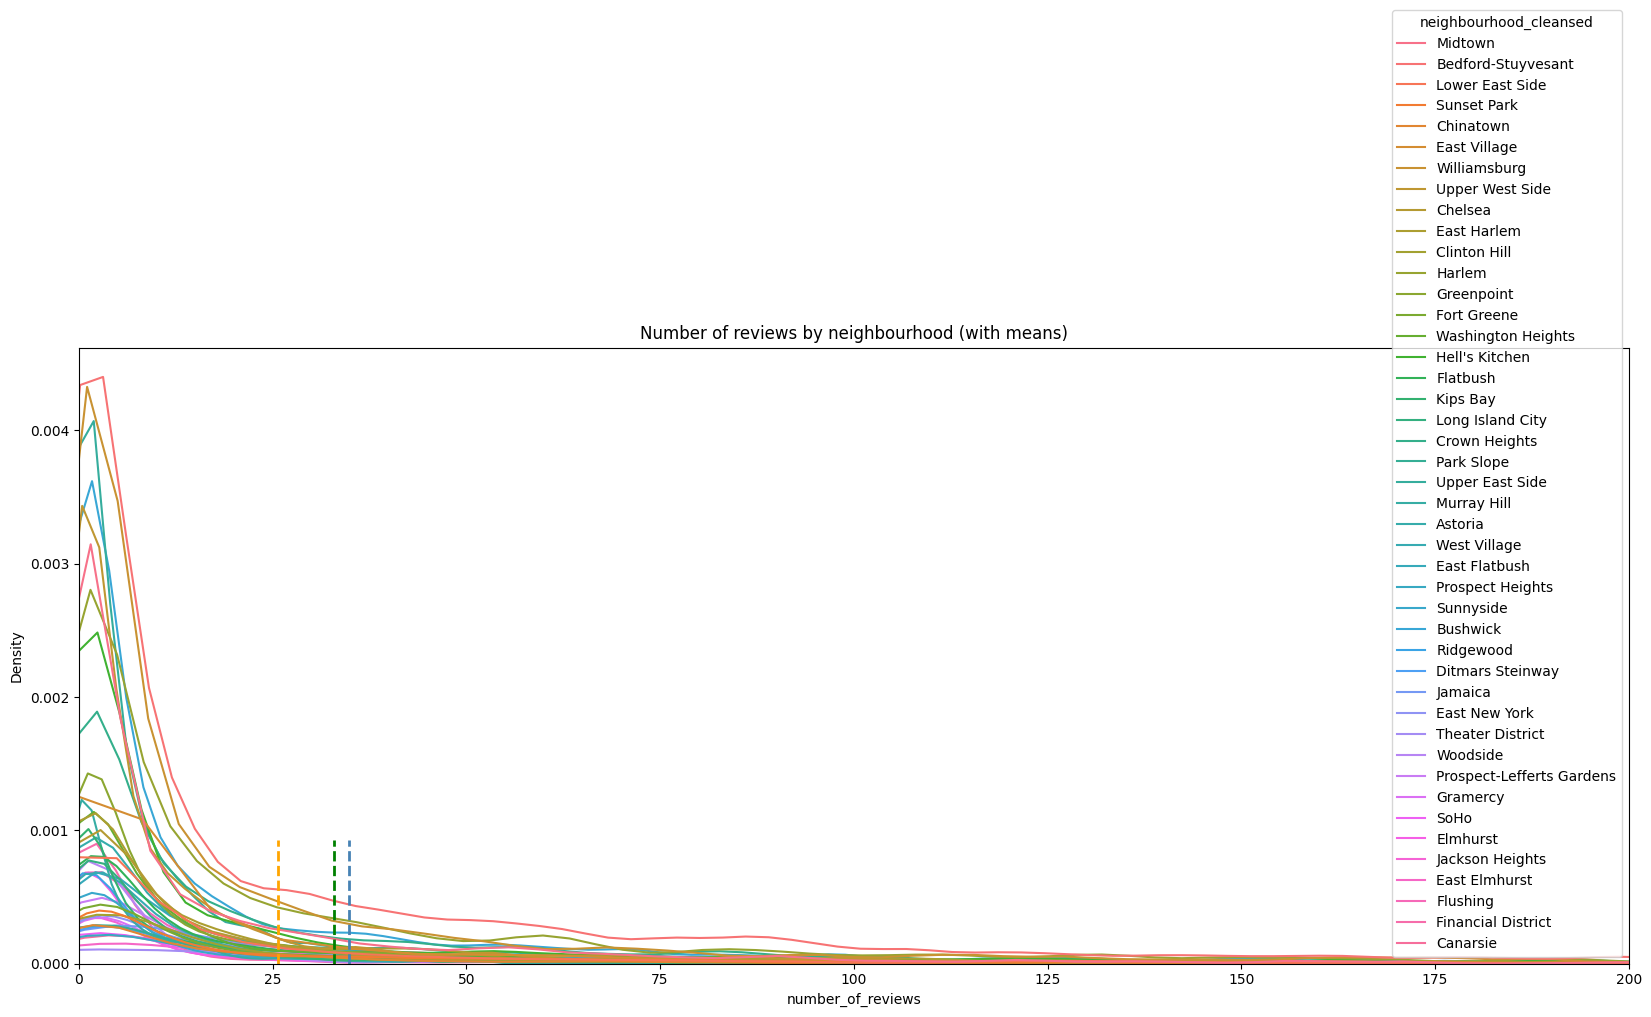

In [82]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Number of reviews by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()

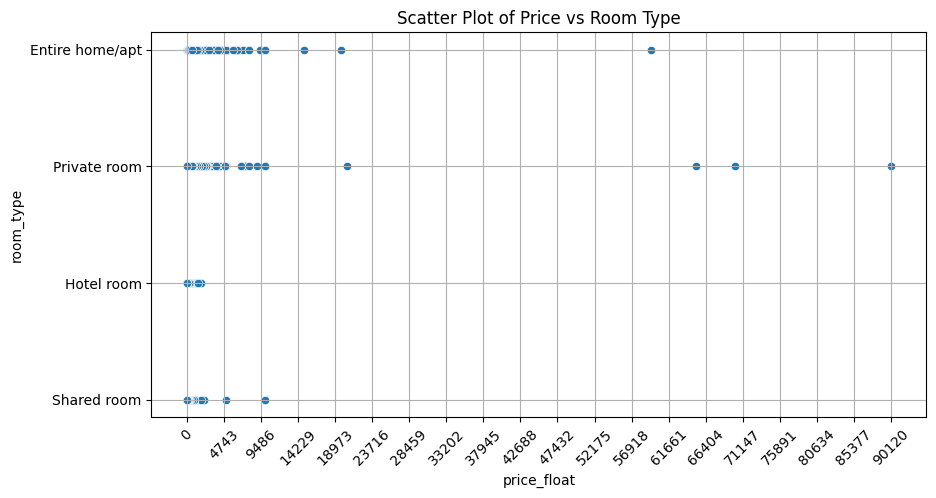

In [101]:
import numpy as np
# Crear el scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=listings_df, x="price_float", y="room_type")
plt.title("Scatter Plot of Price vs Room Type")
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar el eje x
x_ticks = list(np.linspace(listings_df["price_float"].min(), listings_df["price_float"].max(), num=20))
plt.xticks(x_ticks, rotation=45)
plt.grid(True)

plt.show()

<ipython-input-59-3134a80c935d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  listings_df[["price_float", "minimum_nights", "review_scores_cleanliness", "neighbourhood", "room_type", "number_of_reviews"]].corr(),


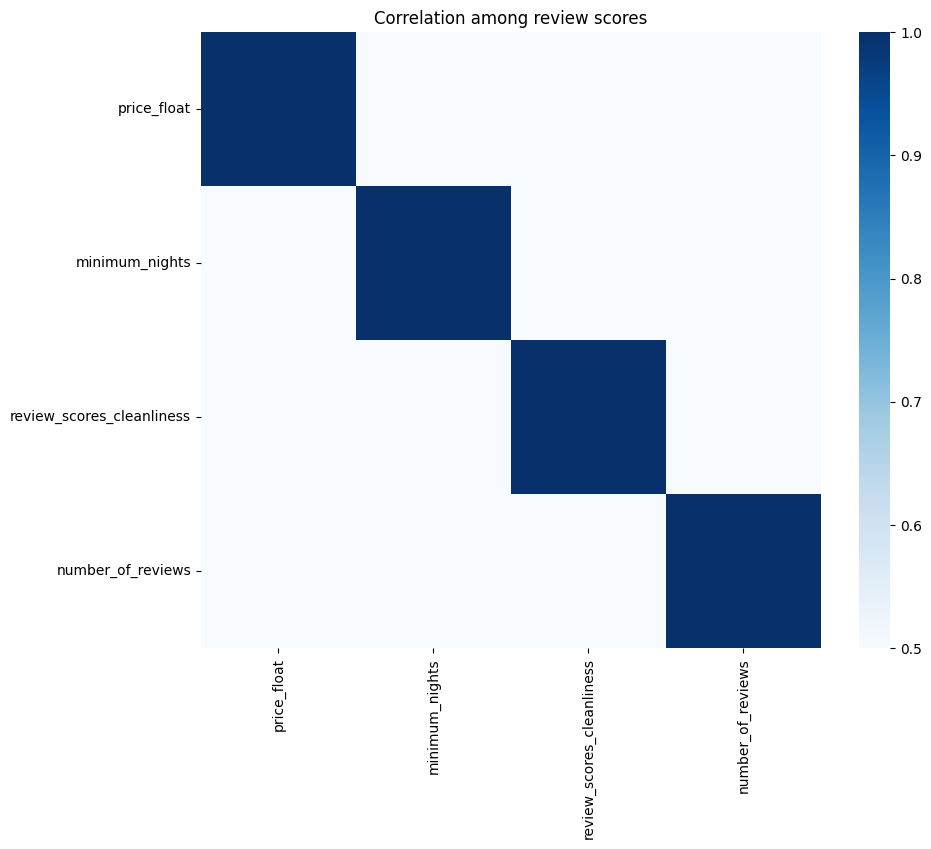

In [59]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["price_float", "minimum_nights", "review_scores_cleanliness", "neighbourhood", "room_type", "number_of_reviews"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [51]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(562, 76)

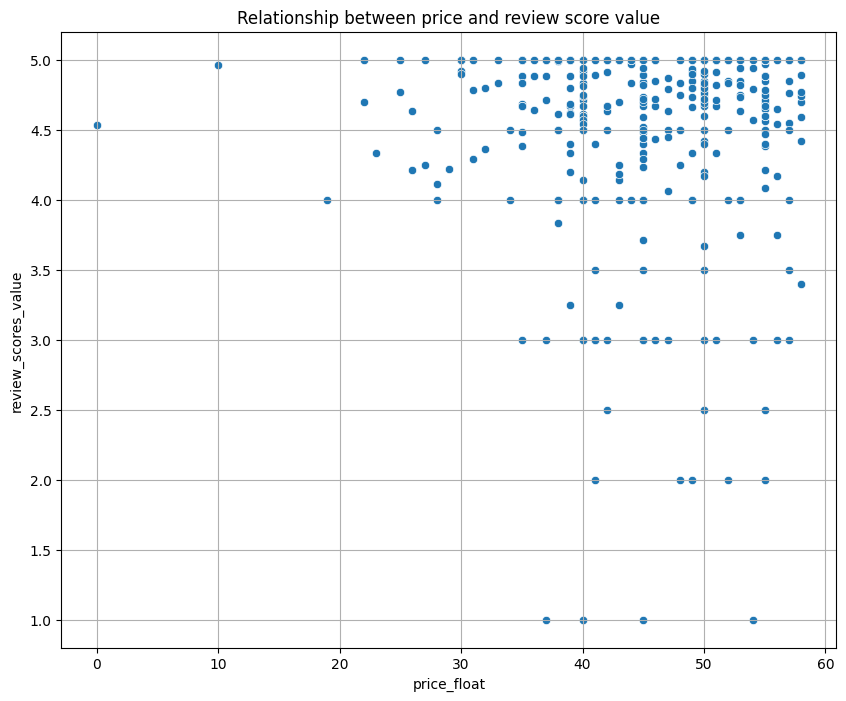

In [52]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [60]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood"].value_counts(normalize=True).cumsum()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32445 (\N{CJK UNIFIED IDEOGRAPH-7EBD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32422 (\N{CJK UNIFIED IDEOGRAPH-7EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


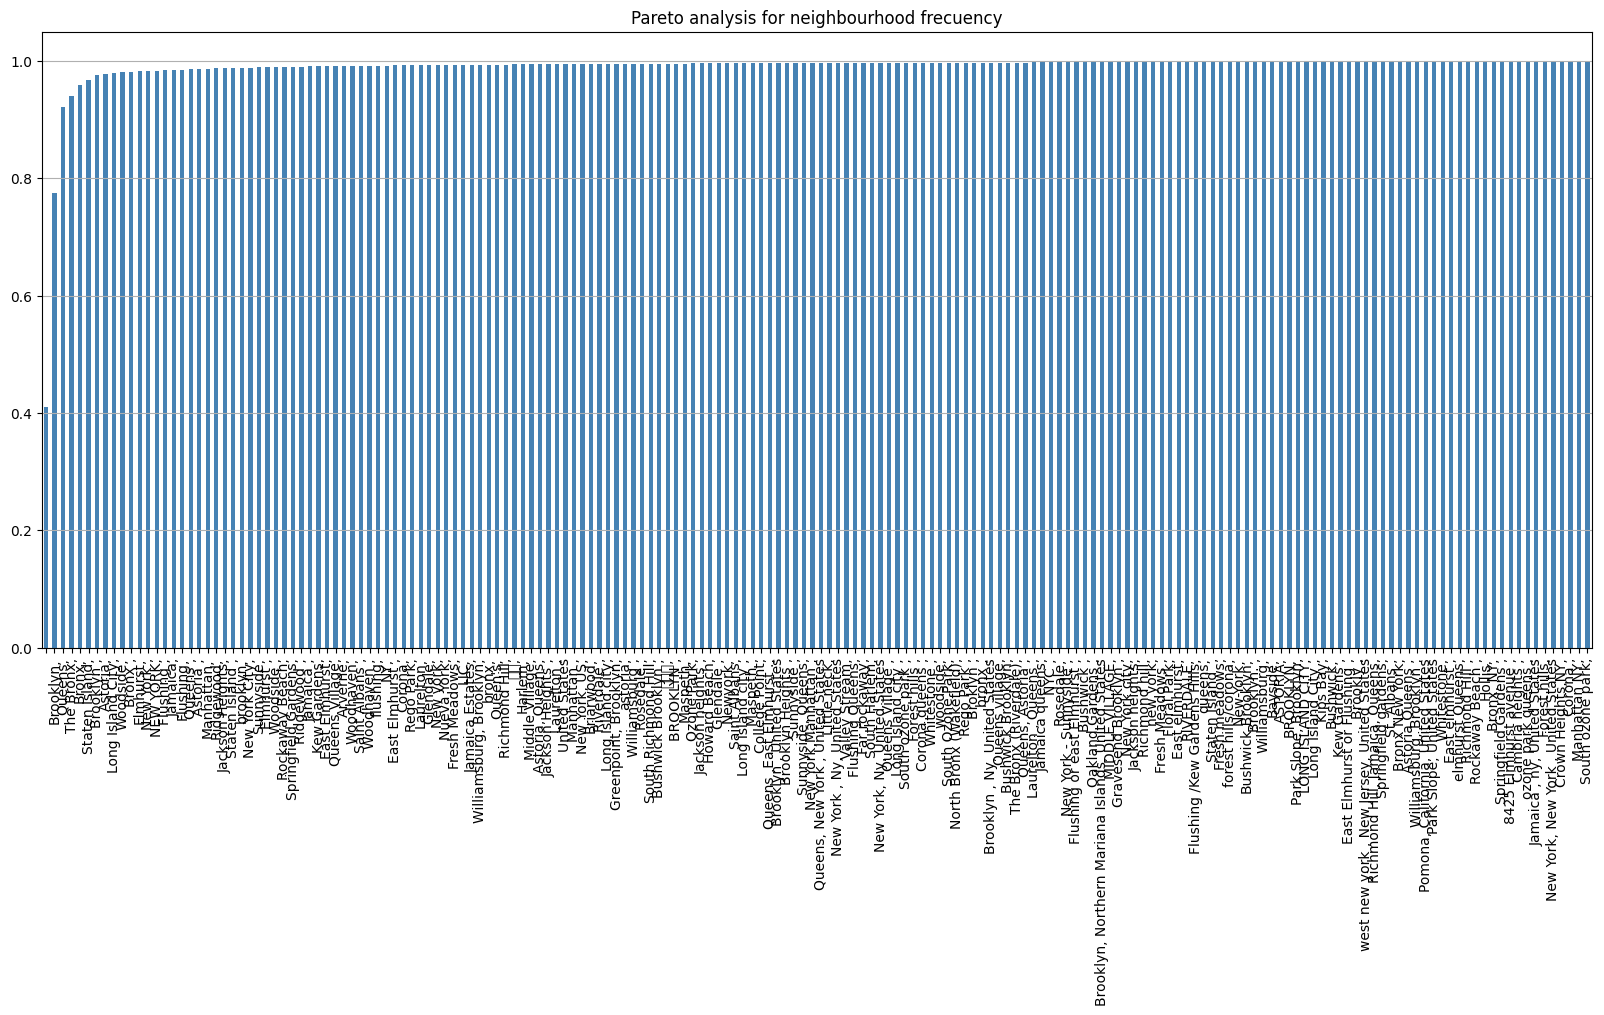

In [61]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [55]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Bedford-Stuyvesant',
 'Williamsburg',
 'Harlem',
 'Midtown',
 'Bushwick',
 "Hell's Kitchen",
 'Upper West Side',
 'Upper East Side',
 'Crown Heights',
 'East Village',
 'East Harlem',
 'Chelsea',
 'Greenpoint',
 'Astoria',
 'Lower East Side',
 'Washington Heights',
 'East Flatbush',
 'Flatbush',
 'Financial District',
 'Flushing',
 'Long Island City',
 'West Village',
 'Murray Hill',
 'Prospect-Lefferts Gardens',
 'Kips Bay',
 'Jamaica',
 'Clinton Hill',
 'Theater District',
 'Ridgewood',
 'Woodside',
 'Fort Greene',
 'East New York',
 'Park Slope',
 'Elmhurst',
 'SoHo',
 'Sunset Park',
 'Sunnyside',
 'East Elmhurst',
 'Chinatown',
 'Canarsie',
 'Ditmars Steinway',
 'Jackson Heights',
 'Gramercy',
 'Prospect Heights']

In [70]:
# Provides important statistical values to keep in mind
listings_df["neighbourhood"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count     25202
unique      182
top            
freq      10320
Name: neighbourhood, dtype: object

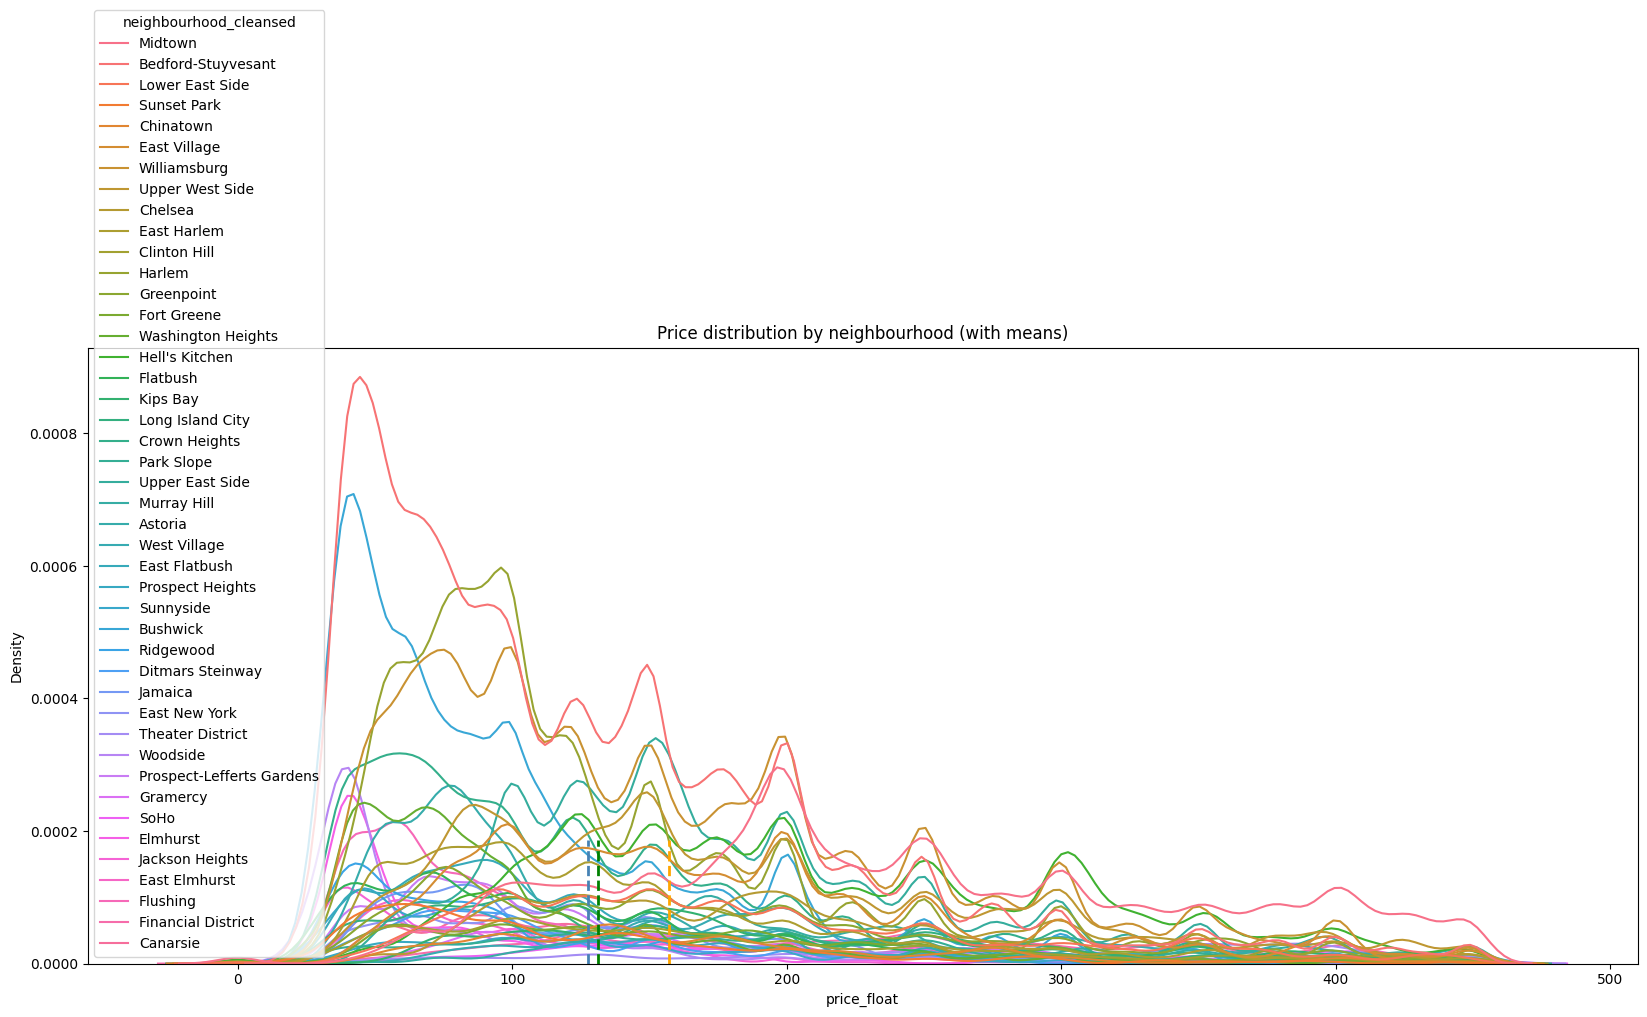

In [71]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

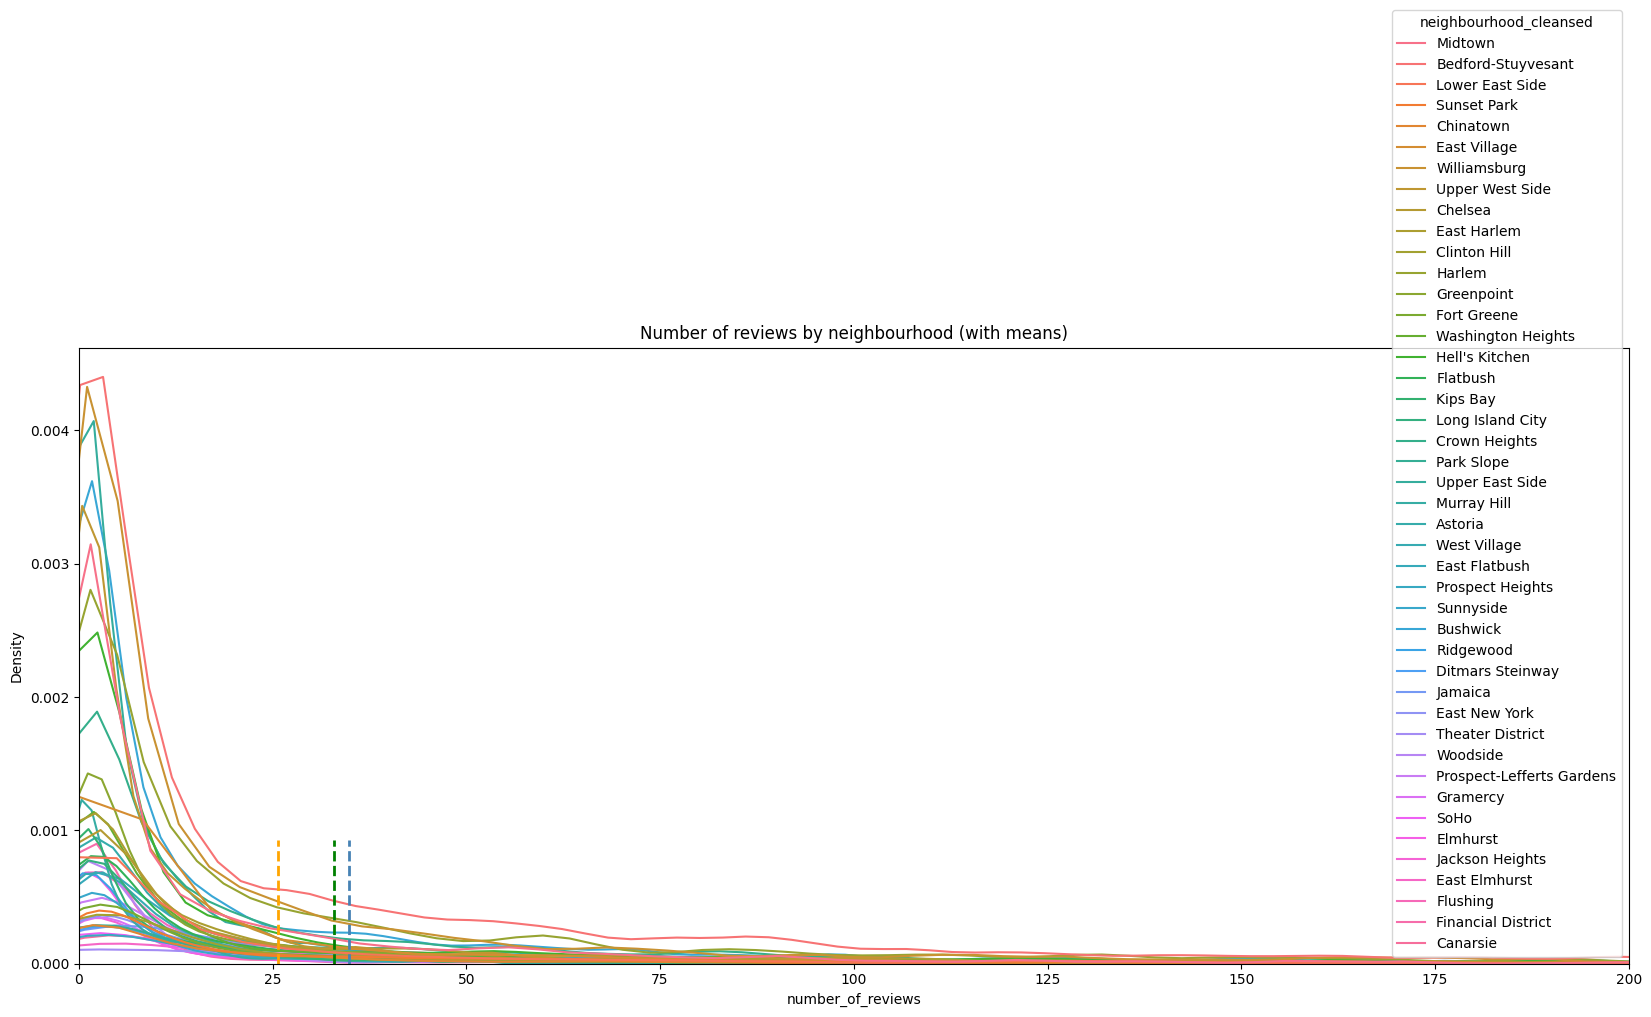

In [81]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Number of reviews by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()